In [1]:
%matplotlib inline
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#model parameters
mu = 0.1      #mean
sigma = 0.15  #volatility
S0 = 1        #starting price
    
N = 10000     #number of simulations
T = [21.0/252, 1.0]  #time horizon in years
step = 1.0/252       #time step in years

In [5]:
#compute state price and probability
u = np.exp(sigma * np.sqrt(step))    #up state price
d = 1.0/u                            #down state price
p = 0.5+0.5*(mu/sigma)*np.sqrt(step) #prob of up state

In [7]:
#binomial tree simulation
up_times = np.zeros((N, len(T)))
down_times = np.zeros((N, len(T)))
for idx in range(len(T)):
    up_times[:,idx] = np.random.binomial(T[idx]/step,  p, N)
    down_times[:,idx] = T[idx]/step - up_times[:,idx]

In [8]:
#compute terminal price
ST = S0 * u**up_times * d**down_times

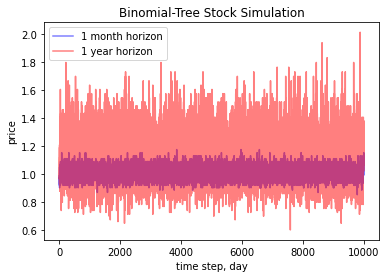

In [13]:
#generate plots
plt.figure()
plt.plot(ST[:,0], color='b', alpha=0.5, label='1 month horizon')
plt.plot(ST[:,1], color='r', alpha=0.5, label='1 year horizon')
plt.xlabel('time step, day')
plt.ylabel('price')
plt.title('Binomial-Tree Stock Simulation')
plt.legend()
plt.show()

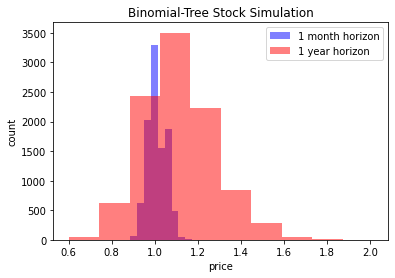

In [14]:
plt.figure()
plt.hist(ST[:,0], color='b', alpha=0.5, label='1 month horizon')
plt.hist(ST[:,1], color='r', alpha=0.5, label='1 year horizon')
plt.xlabel('price')
plt.ylabel('count')
plt.title('Binomial-Tree Stock Simulation')
plt.legend()
plt.show()